## Training neural networks with backpropagation
## Modeling the strength of concrete with ANNs

## Exploring and preparing the data

In [1]:
# import the data
concrete <- read.csv("concrete.csv")
str(concrete)

'data.frame':	1030 obs. of  9 variables:
 $ cement      : num  141 169 250 266 155 ...
 $ slag        : num  212 42.2 0 114 183.4 ...
 $ ash         : num  0 124.3 95.7 0 0 ...
 $ water       : num  204 158 187 228 193 ...
 $ superplastic: num  0 10.8 5.5 0 9.1 0 0 6.4 0 9 ...
 $ coarseagg   : num  972 1081 957 932 1047 ...
 $ fineagg     : num  748 796 861 670 697 ...
 $ age         : int  28 14 28 28 28 90 7 56 28 28 ...
 $ strength    : num  29.9 23.5 29.2 45.9 18.3 ...


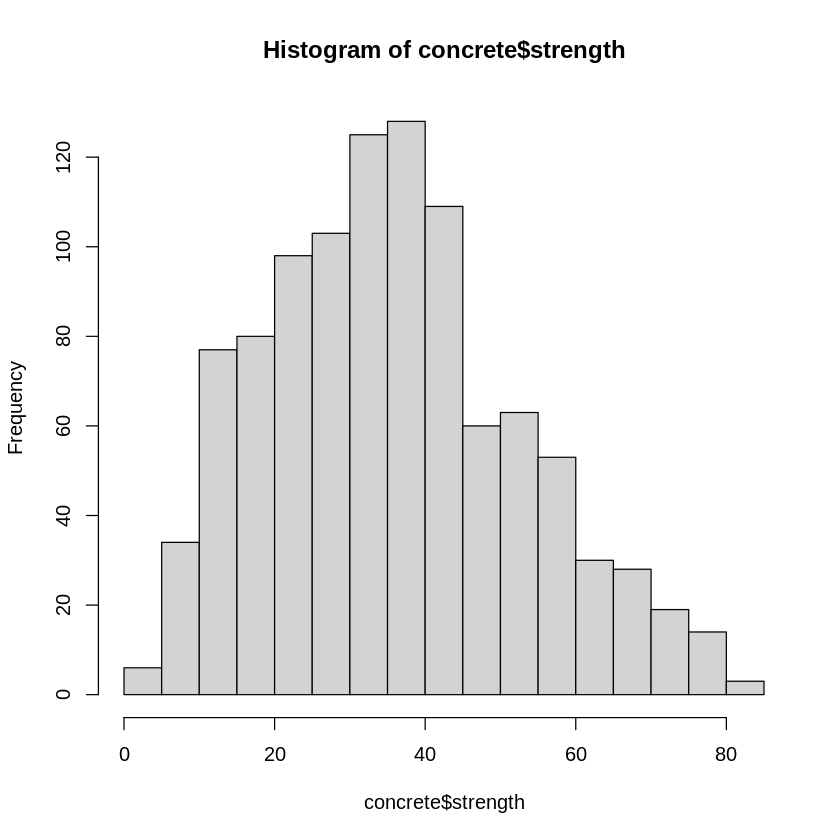

In [3]:
hist(concrete$strength)

In [4]:
# we normalize the data 
# defining the normalization function
normalize <- function(x){
  return((x-min(x))/(max(x)-min(x)))
}

In [5]:
# normalizing the data
concrete_norm <- as.data.frame(lapply(concrete, normalize))
str(concrete_norm)

'data.frame':	1030 obs. of  9 variables:
 $ cement      : num  0.0897 0.1527 0.3379 0.3744 0.1205 ...
 $ slag        : num  0.59 0.117 0 0.317 0.51 ...
 $ ash         : num  0 0.621 0.478 0 0 ...
 $ water       : num  0.653 0.292 0.524 0.848 0.571 ...
 $ superplastic: num  0 0.335 0.171 0 0.283 ...
 $ coarseagg   : num  0.497 0.813 0.453 0.381 0.716 ...
 $ fineagg     : num  0.388 0.507 0.67 0.191 0.258 ...
 $ age         : num  0.0742 0.0357 0.0742 0.0742 0.0742 ...
 $ strength    : num  0.343 0.264 0.335 0.542 0.199 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2664  0.4001  0.4172  0.5457  1.0000 

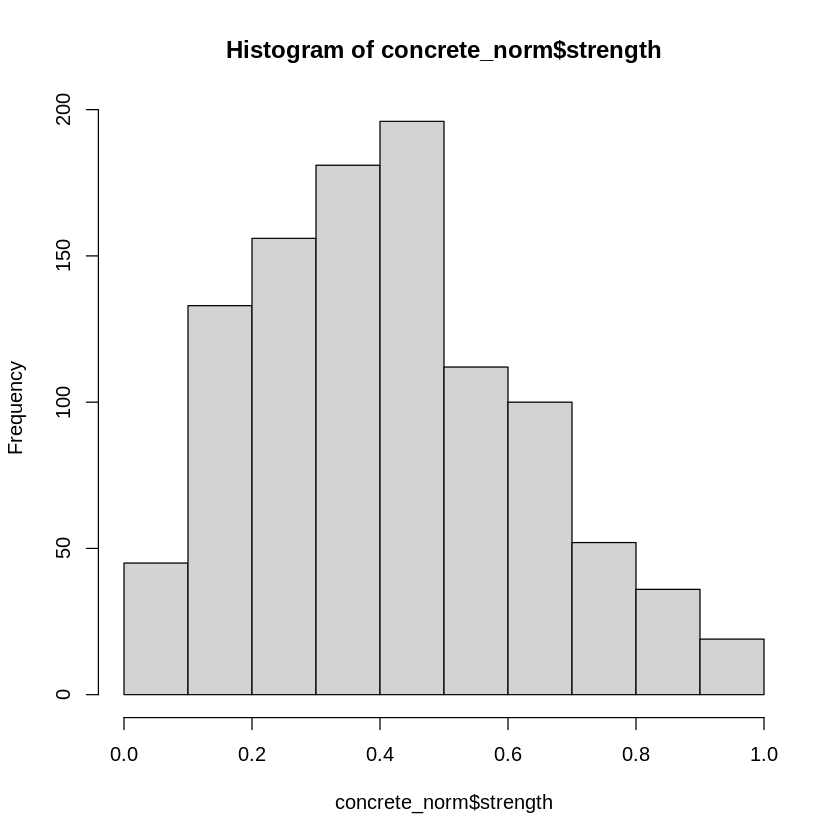

In [7]:
summary(concrete_norm$strength)
hist(concrete_norm$strength)

In [8]:
# partitioning the data train(75%) test(25%)
concrete_train<- concrete_norm[1:773,]
concrete_test <- concrete_norm[774:1030,]

## Training the model on the data

In [22]:
# install.packages("neuralnet")
# training the simplest multilayer feedforward network with only a single hidden node
library(neuralnet)
concrete_model <- neuralnet(strength ~ ., data = concrete_train)
# concrete_model

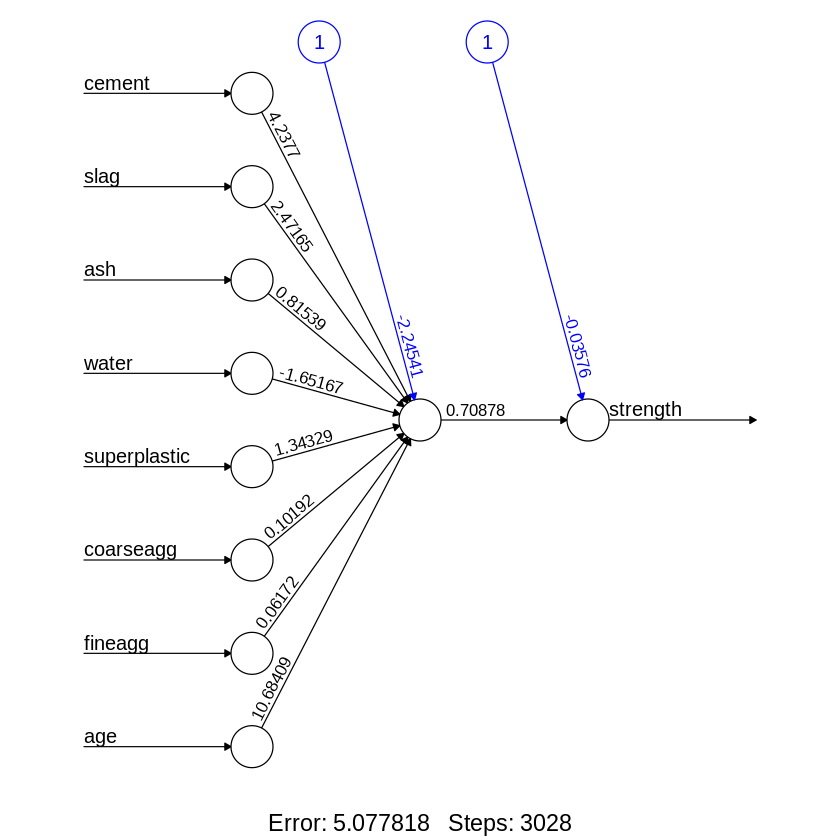

In [36]:
# plotting the neural network
plot(concrete_model, rep = "best")

## Evaluating Model performance

In [24]:
# generating predictions using the compute()
model_results <- compute(concrete_model, concrete_test[1:8])

In [25]:
# the compute() returns two variable, $neurons and $net.results
# we want the latter
predicted_strength <- model_results$net.result

In [26]:
# we measure the correlation between the predicted and the true since 
# this a numeric problem rather than a classification problem
cor(predicted_strength, concrete_test$strength)

0.8063672


The correlation of 0.81 is fairl high meaning that our model is doing a fairly good job.

## Improving the model performance

In [30]:
# increasing the number of hidden nodes in the neuralnet()
concrete_model2 <- neuralnet(strength ~ cement + slag + ash + water + superplastic
                              + coarseagg + fineagg + age, data = concrete_train, 
                              hidden = 5)

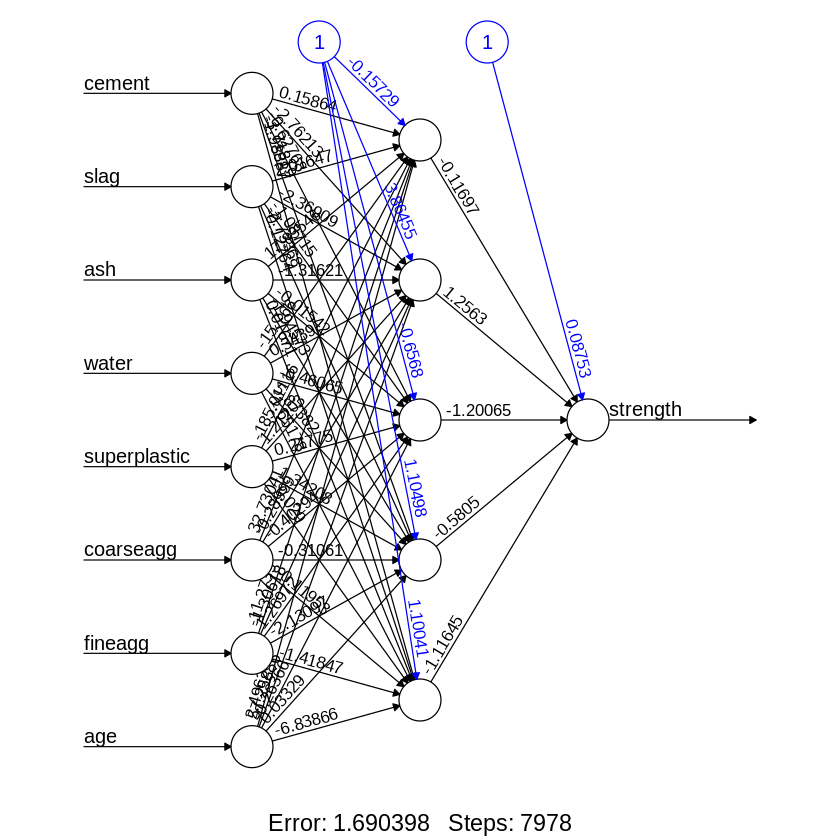

In [35]:
plot(concrete_model2, rep = "best")

In [34]:
model_results2 <- compute(concrete_model2, concrete_test[1:8])
predicted_strength2 <- model_results2$net.result
cor(predicted_strength2, concrete_test$strength)

0.9306817


The correlation has increased to 0.93and hence model is very good